# Ensemble Techniques Project


## Part A



A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all
relevant customer data and develop focused customer retention programs.


**Importing modules for project**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold  
from sklearn.model_selection import cross_val_score  
import pydotplus
import graphviz
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
import pickle
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

**Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.** 

In [4]:
df1=pd.read_csv("TelcomCustomer-Churn_1.csv")

In [5]:
df1

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  
0              No  No phone service             DSL             No  
1             Yes                No             DSL            Yes  
2             Yes                No             DSL            Yes  
3              No  No phone service             DSL            Yes  
4             Yes                No     Fiber optic             No  
...           ...               ...             ...            ...  
7038          Yes               Yes             DSL            Yes  
7039          Yes               Yes     Fiber optic             No  
7040           No  No phone service             DSL            Yes  
7041          Yes               Yes     Fiber optic             No  
7042          Yes                No     Fiber optic            Yes  

[7043 rows x 10 columns]

**Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable**

In [6]:
df2=pd.read_csv("TelcomCustomer-Churn_2.csv")

In [7]:
df2

customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0     7590-VHVEG          Yes               No          No          No   
1     5575-GNVDE           No              Yes          No          No   
2     3668-QPYBK          Yes               No          No          No   
3     7795-CFOCW           No              Yes         Yes          No   
4     9237-HQITU           No               No          No          No   
...          ...          ...              ...         ...         ...   
7038  6840-RESVB           No              Yes         Yes         Yes   
7039  2234-XADUH          Yes              Yes          No         Yes   
7040  4801-JZAZL           No               No          No          No   
7041  8361-LTMKD           No               No          No          No   
7042  3186-AJIEK           No              Yes         Yes         Yes   

     StreamingMovies        Contract PaperlessBilling  \
0                 No  Month-to-month              Yes   
1                 No        One year               No   
2                 No  Month-to-month              Yes   
3                 No        One year               No   
4                 No  Month-to-month              Yes   
...              ...             ...              ...   
7038             Yes        One year              Yes   
7039             Yes        One year              Yes   
7040              No  Month-to-month              Yes   
7041              No  Month-to-month              Yes   
7042             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Electronic check           29.85        29.85    No  
1                  Mailed check           56.95       1889.5    No  
2                  Mailed check           53.85       108.15   Yes  
3     Bank transfer (automatic)           42.30      1840.75    No  
4              Electronic check           70.70       151.65   Yes  
...                         ...             ...          ...   ...  
7038               Mailed check           84.80       1990.5    No  
7039    Credit card (automatic)          103.20       7362.9    No  
7040           Electronic check           29.60       346.45    No  
7041               Mailed check           74.40        306.6   Yes  
7042  Bank transfer (automatic)          105.65       6844.5    No  

[7043 rows x 12 columns]

**Merge both the DataFrames on key ‘customerID’ to form a single DataFrame**

In [8]:
df=pd.merge(df1, df2, on='customerID')

In [7]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [8]:
df.to_csv("churn.csv",index=False)

**Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.**

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.columns&df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

we can see that columns form df1 are merged in df

In [11]:
df.columns&df2.columns

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

we can see that columns form df2 are merged in df

**Impute missing/unexpected values in the DataFrame**

In [12]:
df=df.replace(r'^\s*$', np.nan, regex=True)

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df= df.dropna()

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Null values are droped from dataframe

In [16]:
churndf=df.copy()

**Make sure all the variables with continuous values are of ‘Float’ type**

In [17]:
churndf.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

monthlycharges,totalcharges,tenure are continous values changing its datatype to flot.

In [18]:
churndf['tenure'] = churndf['tenure'].astype(float)
churndf['MonthlyCharges'] = churndf['MonthlyCharges'].astype(float)
churndf['TotalCharges'] = churndf['TotalCharges'].astype(float)

In [427]:
churndf.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
distribution in the pie-chart.**

In [19]:
import plotly.express as px
# if user did not set categorical_features 
def plotpie(df,categorical_features = None,dropna= False):
    categorical_features = churndf.select_dtypes(['object','category']).columns.to_list()
    print(categorical_features)
    threshold=17
    # loop through the list of categorical_features 
    for cat_feature in categorical_features: 
        num_unique = churndf[cat_feature].nunique(dropna = dropna)
        num_missing = churndf[cat_feature].isna().sum()
        # prints pie chart and info if unique values below threshold 
        if num_unique <= threshold:
            print('Pie Chart for: ', cat_feature)
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            fig = px.pie(churndf[cat_feature].value_counts(dropna = dropna), values=cat_feature, 
                 names = churndf[cat_feature].value_counts(dropna = dropna).index,title = cat_feature,template='ggplot2')
            fig.show()
        else: 
            print('Pie Chart for ',cat_feature,' is unavailable due high number of Unique Values ')
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            print('\n')

In [20]:
plotpie(churndf)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Pie Chart for  customerID  is unavailable due high number of Unique Values 
Number of Unique Values:  7032
Number of Missing Values:  0


Pie Chart for:  gender
Number of Unique Values:  2
Number of Missing Values:  0


Pie Chart for:  Partner
Number of Unique Values:  2
Number of Missing Values:  0


Pie Chart for:  Dependents
Number of Unique Values:  2
Number of Missing Values:  0


Pie Chart for:  PhoneService
Number of Unique Values:  2
Number of Missing Values:  0


Pie Chart for:  MultipleLines
Number of Unique Values:  3
Number of Missing Values:  0


Pie Chart for:  InternetService
Number of Unique Values:  3
Number of Missing Values:  0


Pie Chart for:  OnlineSecurity
Number of Unique Values:  3
Number of Missing Values:  0


Pie Chart for:  OnlineBackup
Number of Unique Values:  3
Number of Missing Values:  0


Pie Chart for:  DeviceProtection
Number of Unique Values:  3
Number of Missing Values:  0


Pie Chart for:  TechSupport
Number of Unique Values:  3
Number of Missing Values:  0


Pie Chart for:  StreamingTV
Number of Unique Values:  3
Number of Missing Values:  0


Pie Chart for:  StreamingMovies
Number of Unique Values:  3
Number of Missing Values:  0


Pie Chart for:  Contract
Number of Unique Values:  3
Number of Missing Values:  0


Pie Chart for:  PaperlessBilling
Number of Unique Values:  2
Number of Missing Values:  0


Pie Chart for:  PaymentMethod
Number of Unique Values:  4
Number of Missing Values:  0


Pie Chart for:  Churn
Number of Unique Values:  2
Number of Missing Values:  0


**Share insights for Q2.c**

Genderwise data is seprated almost equally.

There are 30% dependents in data.

90.3% have phoneservices.

out of the them 42.2% have multiple lines.

44.4% people uses fiber optic internet services 34.4% people use DSL and 21.6% people do not have internet services.

out of the people who have internet services 28.7% have online security.

34.5% have online backup 34.4% have device protection 29% have techsupport.

38.4% have streaming tv services.

38.8% have streaming movies services.

out of three types of contract most of the people opt for month to month subcribtion.

60% people choose paperless billing.

electronic mail is most prefered payment method.

there is little biasedness in churning 73.4% do not churn.

**Encode all the appropriate Categorical features with the best suitable approach**

In [430]:
churndf1=churndf.copy()

In [431]:
churndf1

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No     1.0   
1     5575-GNVDE    Male              0      No         No    34.0   
2     3668-QPYBK    Male              0      No         No     2.0   
3     7795-CFOCW    Male              0      No         No    45.0   
4     9237-HQITU  Female              0      No         No     2.0   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes    24.0   
7039  2234-XADUH  Female              0     Yes        Yes    72.0   
7040  4801-JZAZL  Female              0     Yes        Yes    11.0   
7041  8361-LTMKD    Male              1     Yes         No     4.0   
7042  3186-AJIEK    Male              0      No         No    66.0   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7032 rows x 21 columns]

In [432]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(churndf1['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
churndf1 = pd.concat([churndf1,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(churndf1['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
churndf1 = pd.concat([churndf1,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(churndf1['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
churndf1 = pd.concat([churndf1,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(churndf1['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
churndf1 = pd.concat([churndf1,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(churndf1['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
churndf1 = pd.concat([churndf1,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(churndf1['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
churndf1 = pd.concat([churndf1,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(churndf1['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
churndf1 = pd.concat([churndf1,sm1], axis=1)

In [433]:
churndf1

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No     1.0   
1     5575-GNVDE    Male              0      No         No    34.0   
2     3668-QPYBK    Male              0      No         No     2.0   
3     7795-CFOCW    Male              0      No         No    45.0   
4     9237-HQITU  Female              0      No         No     2.0   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes    24.0   
7039  2234-XADUH  Female              0     Yes        Yes    72.0   
7040  4801-JZAZL  Female              0     Yes        Yes    11.0   
7041  8361-LTMKD    Male              1     Yes         No     4.0   
7042  3186-AJIEK    Male              0      No         No    66.0   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     OnlineBackup_No OnlineBackup_Yes DeviceProtection_No  \
0                  0                1                   1   
1                  1                0                   0   
2                  0                1                   1   
3                  1                0                   0   
4                  1                0                   1   
...              ...              ...                 ...   
7038               1                0                   0   
7039               0                1                   0   
7040               1                0                   1   
7041               1                0                   1   
7042               1                0                   0   

     DeviceProtection_Yes TechSupport_No TechSupport_Yes StreamingTV_No  \
0                       0              1               0              1   
1                       1              1               0              1   
2                       0              1               0              1   
3                       1              0               1              1   
4                       0              1               0              1   
...                   ...            ...             ...            ...   
7038                    1              0               1              0   
7039                    1              1               0              0   
7040                    0              1               0              1   
7041                    0              1               0              1   
7042                    1              0               1              0   

     StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  
0                  0                   1                    0  
1                  0                   1                    0  
2                  0                   1                    0  
3                  0                   1                    0  
4                  0                   1                    0  
...              ...                 ...                  ...  
7038               1                   0                    1  
7039               1                   0                    1  
7040               0                   1              

In [434]:
collist =['Contract', 'PaymentMethod', 'gender', 'InternetService','PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
LE = LabelEncoder()
for i in collist:
    churndf1[i] = LE.fit_transform(churndf1[i])

In [435]:
# We have created dummies for the below variables, so we can drop them
churndf1 = churndf1.drop(['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], 1)

In [436]:
churndf1

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0     1.0   
1     5575-GNVDE       1              0        0           0    34.0   
2     3668-QPYBK       1              0        0           0     2.0   
3     7795-CFOCW       1              0        0           0    45.0   
4     9237-HQITU       0              0        0           0     2.0   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       1              0        1           1    24.0   
7039  2234-XADUH       0              0        1           1    72.0   
7040  4801-JZAZL       0              0        1           1    11.0   
7041  8361-LTMKD       1              1        1           0     4.0   
7042  3186-AJIEK       1              0        0           0    66.0   

      PhoneService  InternetService  Contract  PaperlessBilling  ...  \
0                0                0         0                 1  ...   
1                1                0         1                 0  ...   
2                1                0         0                 1  ...   
3                0                0         1                 0  ...   
4                1                1         0                 1  ...   
...            ...              ...       ...               ...  ...   
7038             1                0         1                 1  ...   
7039             1                1         1                 1  ...   
7040             0                0         0                 1  ...   
7041             1                1         0                 1  ...   
7042             1                1         2                 1  ...   

      OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
0                   0                 1                    1   
1                   1                 0                    0   
2                   0                 1                    1   
3                   1                 0                    0   
4                   1                 0                    1   
...               ...               ...                  ...   
7038                1                 0                    0   
7039                0                 1                    0   
7040                1                 0                    1   
7041                1                 0                    1   
7042                1                 0                    0   

      DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  StreamingTV_No  \
0                        0               1                0               1   
1                        1               1                0               1   
2                        0               1                0               1   
3                        1               0                1               1   
4                        0               1                0               1   
...                    ...             ...              ...             ...   
7038                     1               0                1               0   
7039                     1               1                0               0   
7040                     0               1                0               1   
7041                     0               1                0               1   
7042                     1               0                1               0   

      StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  
0                   0                   1                    0  
1                   0                   1                    0  
2                   0                   1                    0  
3                   0                   1                    0  
4                   0                   1                    0  
...               ...                 ...                  ...  
7038                1                   0                    1  
7039                1                 

In [437]:
churndf1 =churndf1.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)

In [438]:
churndf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7032 non-null   object 
 1   gender                7032 non-null   int32  
 2   SeniorCitizen         7032 non-null   int64  
 3   Partner               7032 non-null   int32  
 4   Dependents            7032 non-null   int32  
 5   tenure                7032 non-null   float64
 6   PhoneService          7032 non-null   int32  
 7   InternetService       7032 non-null   int32  
 8   Contract              7032 non-null   int32  
 9   PaperlessBilling      7032 non-null   int32  
 10  PaymentMethod         7032 non-null   int32  
 11  MonthlyCharges        7032 non-null   float64
 12  TotalCharges          7032 non-null   float64
 13  Churn                 7032 non-null   int32  
 14  MultipleLines_Yes     7032 non-null   uint8  
 15  OnlineSecurity_Yes   

**Split the data into 80% train and 20% test.**

In [439]:
X = churndf1.drop(['Churn','customerID'], axis=1)

X.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0     1.0             0   
1       1              0        0           0    34.0             1   
2       1              0        0           0     2.0             1   
3       1              0        0           0    45.0             0   
4       0              0        0           0     2.0             1   

   InternetService  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0                0         0                 1              2           29.85   
1                0         1                 0              3           56.95   
2                0         0                 1              3           53.85   
3                0         1                 0              0           42.30   
4                1         0                 1              2           70.70   

   TotalCharges  MultipleLines_Yes  OnlineSecurity_Yes  OnlineBackup_Yes  \
0         29.85                  0                   0                 1   
1       1889.50                  0                   1                 0   
2        108.15                  0                   1                 1   
3       1840.75                  0                   1                 0   
4        151.65                  0                   0                 0   

   DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  StreamingMovies_Yes  
0                     0                0                0                    0  
1                     1                0                0                    0  
2                     0                0                0                    0  
3                     1                1                0                    0  
4                     0                0                0                    0

In [440]:
y = churndf1['Churn'] #target variable

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

**Normalize/Standardize the data with the best suitable approach.**

In [442]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_train.head(5)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
1010       1              0        0           0 -1.201477             1   
2732       0              0        0           1 -1.160653             1   
2940       1              1        0           0  0.839728             0   
859        1              0        1           1  1.615386             0   
2895       0              0        1           0  0.186543             1   

      InternetService  Contract  PaperlessBilling  PaymentMethod  \
1010                0         0                 1              3   
2732                2         0                 0              1   
2940                0         0                 1              2   
859                 0         2                 1              1   
2895                2         1                 1              0   

      MonthlyCharges  TotalCharges  MultipleLines_Yes  OnlineSecurity_Yes  \
1010       -0.483666     -0.937173                  0                   1   
2732       -1.472880     -0.966413                  0                   0   
2940       -0.340687      0.249914                  0                   0   
859         0.003460      1.071889                  0                   1   
2895       -1.491168     -0.691863                  0                   0   

      OnlineBackup_Yes  DeviceProtection_Yes  TechSupport_Yes  \
1010                 0                     0                0   
2732                 0                     0                0   
2940                 1                     1                0   
859                  1                     1                1   
2895                 0                     0                0   

      StreamingTV_Yes  StreamingMovies_Yes  
1010                0                    0  
2732                0                    0  
2940                1                    1  
859                 1                    1  
2895                0                    0

**Train a model using XGBoost. Also print best performing parameters along with train and test performance.**

In [443]:
import xgboost as xgb
from xgboost import plot_tree

In [444]:
xg_reg = xgb.XGBClassifier()
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
predictedlabels = xg_reg.predict(X_train)
print('Accuracy on Test data:',xg_reg.score(X_test, y_test) )
print('Accuracy on Training data:',xg_reg.score(X_train, y_train) )


Accuracy on Test data: 0.7704335465529495
Accuracy on Training data: 0.9454222222222223


accuracy on testing data is 77% and its 94% on traning data this is because its overfitting the data.

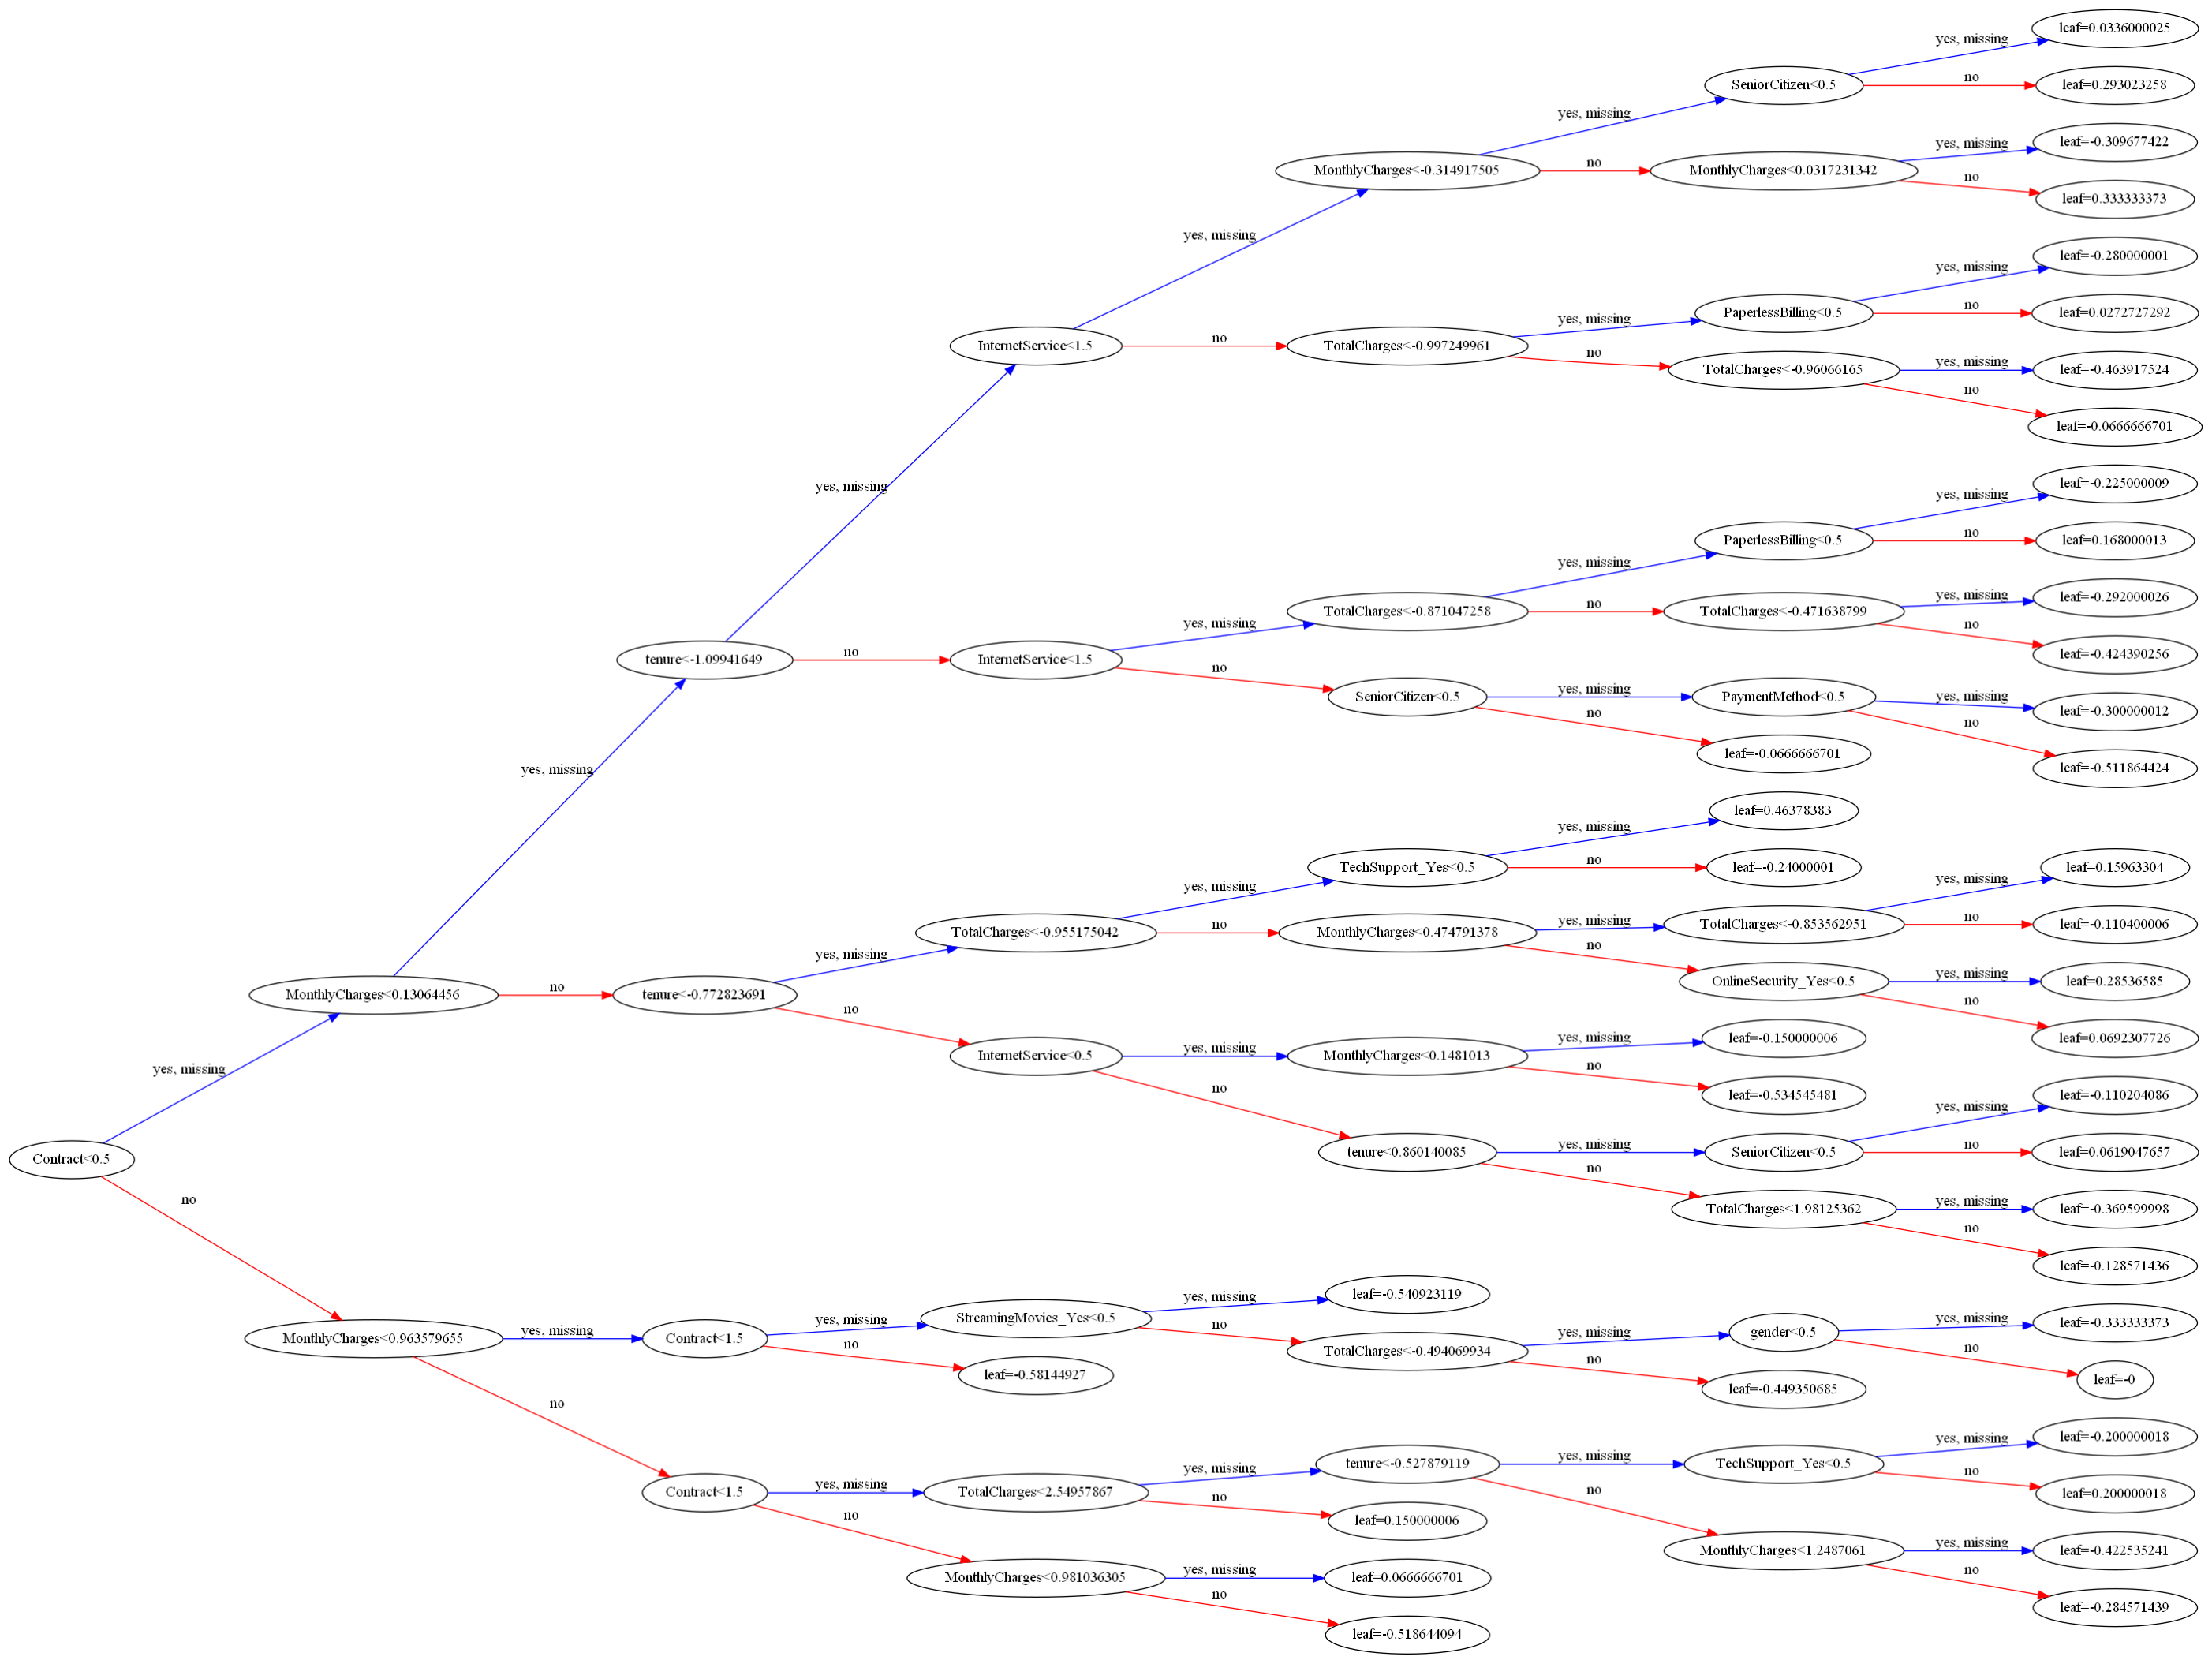

In [445]:
fig, ax = plt.subplots(figsize=(50,100))
xgb.plot_tree(xg_reg,rankdir='LR', ax=ax)
plt.show()


confusion matrix for test data


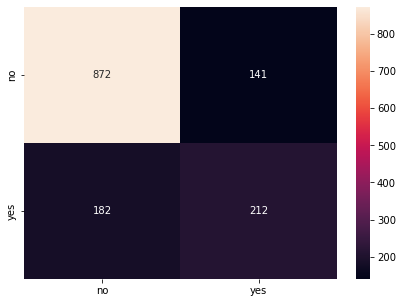

In [446]:
print("confusion matrix for test data")
cm = confusion_matrix(y_test, preds, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['no','yes']],
                  columns = [i for i in ['no','yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()


In [447]:
print("classification  Matrix of testing data:\n",classification_report(y_test,preds))

classification  Matrix of testing data:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1013
           1       0.60      0.54      0.57       394

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.76      0.77      0.77      1407



confusion matrix for training data


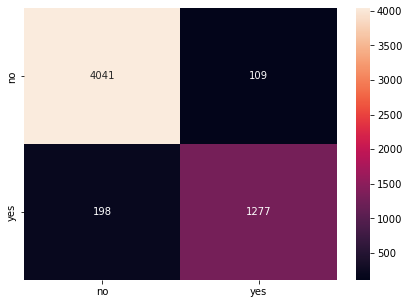

In [448]:
print("confusion matrix for training data")
cm = confusion_matrix(y_train, predictedlabels, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['no','yes']],
                  columns = [i for i in ['no','yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [449]:
print("classification  Matrix of training data:\n",classification_report(y_train,predictedlabels))

classification  Matrix of training data:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4150
           1       0.92      0.87      0.89      1475

    accuracy                           0.95      5625
   macro avg       0.94      0.92      0.93      5625
weighted avg       0.94      0.95      0.94      5625



In [450]:
print(pd.DataFrame(xg_reg.feature_importances_*100,columns =["IMP"],index = X_train.columns))

                            IMP
gender                 1.947350
SeniorCitizen          2.937410
Partner                1.653309
Dependents             2.643896
tenure                 3.762555
PhoneService           2.680086
InternetService       10.844049
Contract              44.031151
PaperlessBilling       3.093621
PaymentMethod          2.250037
MonthlyCharges         2.921533
TotalCharges           2.404255
MultipleLines_Yes      2.346547
OnlineSecurity_Yes     2.612715
OnlineBackup_Yes       2.511072
DeviceProtection_Yes   1.662004
TechSupport_Yes        4.154103
StreamingTV_Yes        2.370469
StreamingMovies_Yes    3.173835


contract is acting as root node in the tree. contract has more important then any other columns. 

We can can perform hyperparameter tunning to get the optimal results.

**Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.**

In [461]:
X_train = X_train.drop(['gender','Partner','DeviceProtection_Yes'], axis=1)
X_test = X_test.drop(['gender','Partner','DeviceProtection_Yes'], axis=1)

removing columns with low importance

In [462]:
# A parameter grid for XGBoost
params = {'subsample': [0.6, 0.8, 1.0],
        'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
        }

In [463]:
folds = 3
clf=xgb.XGBClassifier()
grid_search = GridSearchCV(clf, param_grid=params, scoring='roc_auc', cv=folds, verbose=1)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [464]:
print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best hyperparameters:')
print(grid_search.best_params_)
print(grid_search.best_score_ )


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 Best hyperparameters:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
0.8492384584455629


In [465]:
xgbs= xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
                monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)
xgbs.fit(X_train,y_train)

preds = xgbs.predict(X_test)
predictedlabels = xgbs.predict(X_train)
print('Accuracy on Test data:',xgbs.score(X_test, y_test) )
print('Accuracy on Training data:',xgbs.score(X_train, y_train) )

Accuracy on Test data: 0.7882018479033405
Accuracy on Training data: 0.8163555555555555


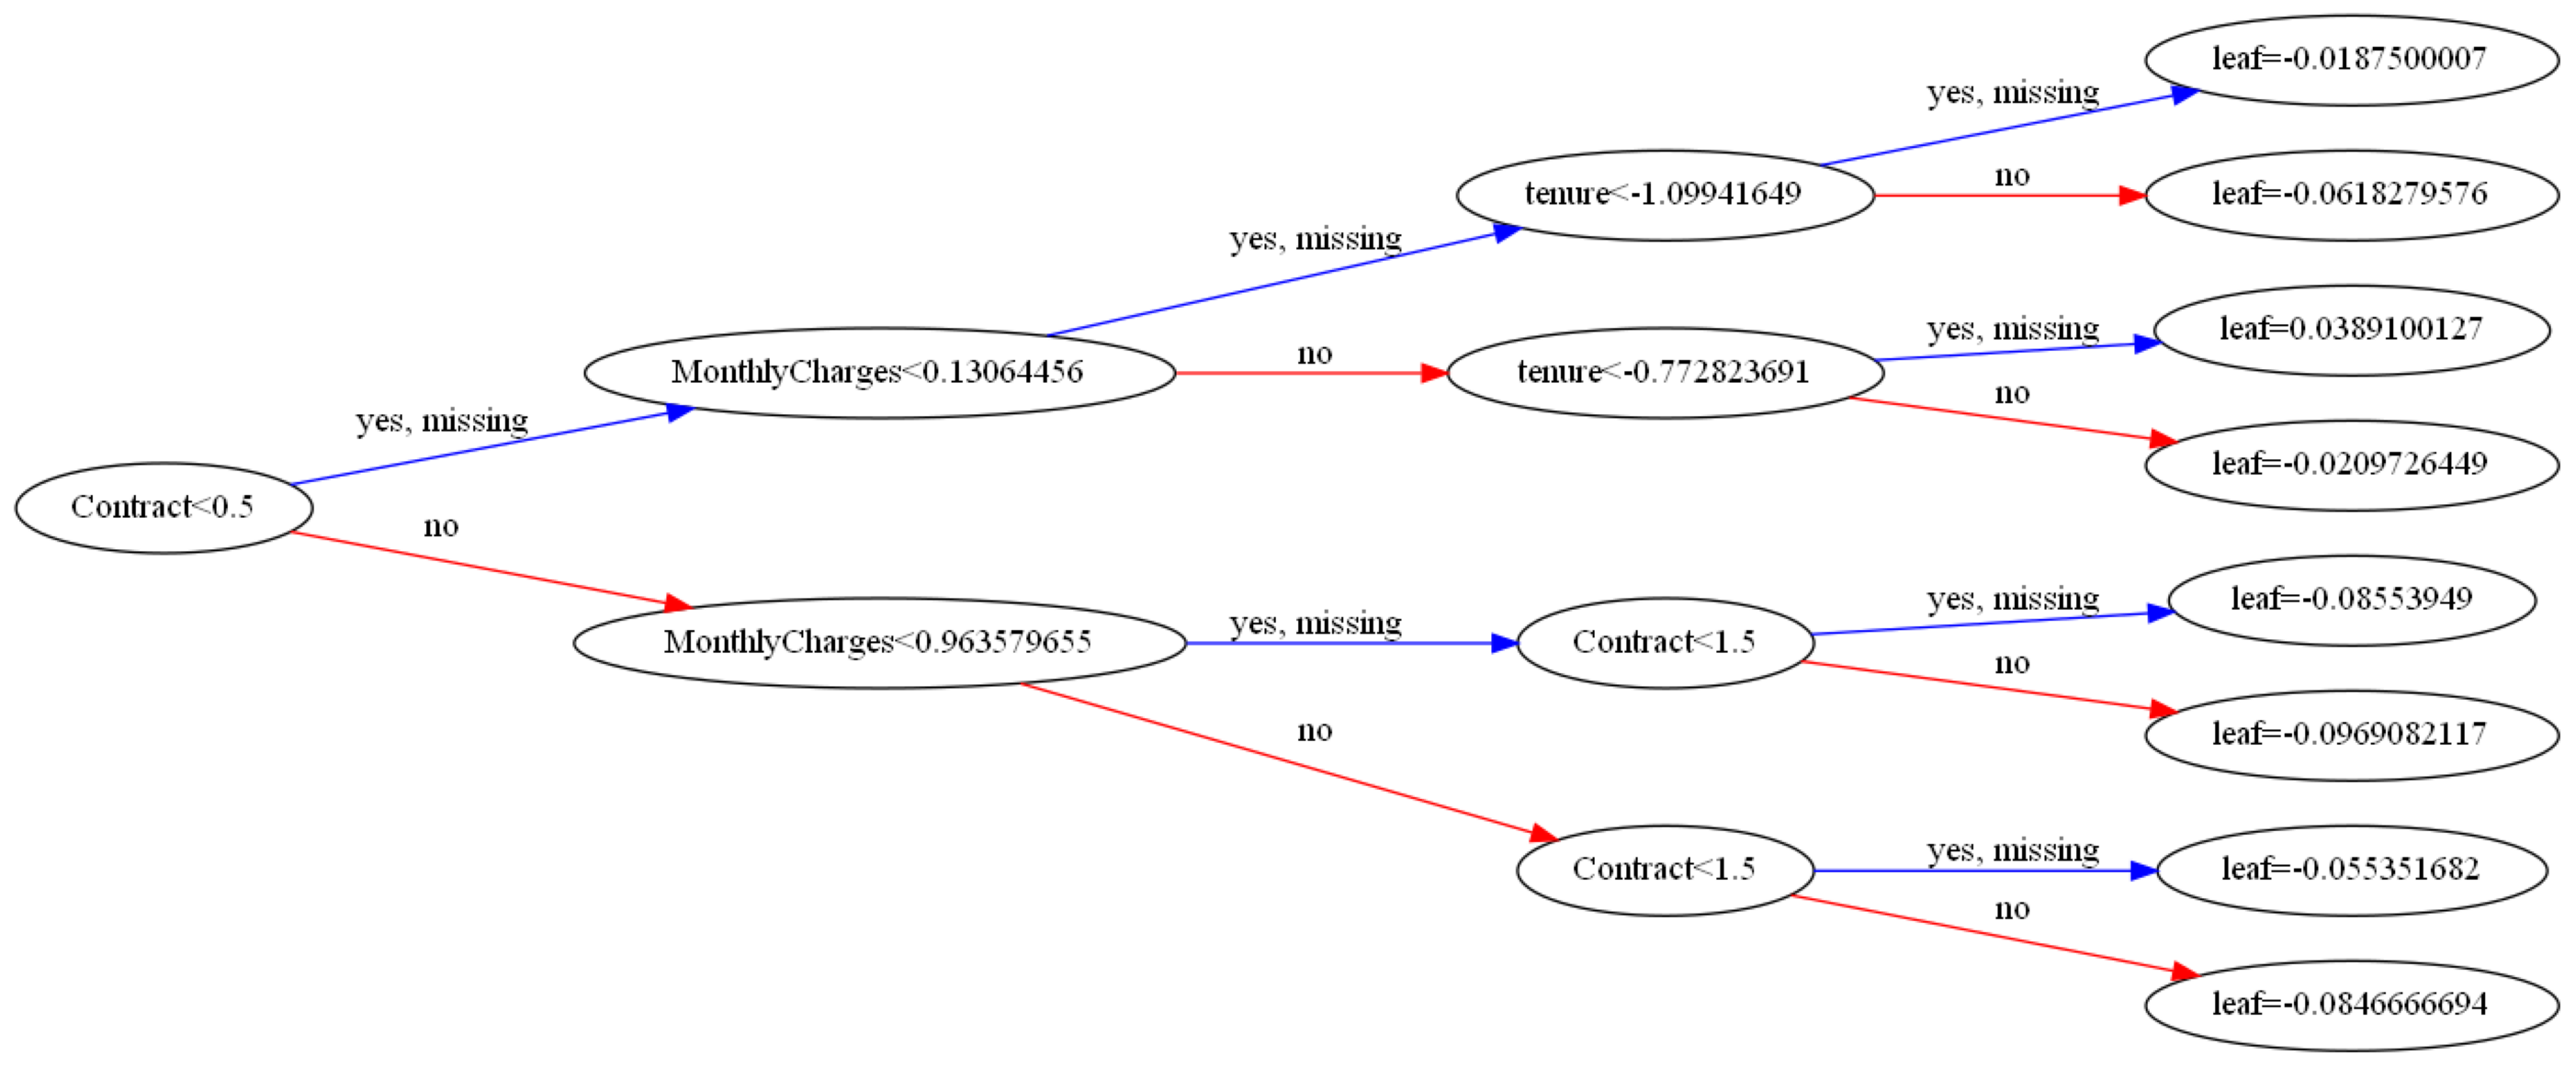

In [466]:
fig, ax = plt.subplots(figsize=(50,100))
#xgb.plot_tree(xgbs, ax=ax)
xgb.plot_tree(xgbs,rankdir='LR',ax=ax)
plt.show()


In [467]:
print(pd.DataFrame(xgbs.feature_importances_*100,columns =["IMP"],index = X_train.columns))

                           IMP
SeniorCitizen         3.556906
Dependents            1.966765
tenure                8.688095
PhoneService          1.307482
InternetService       8.239846
Contract             33.494629
PaperlessBilling      7.514754
PaymentMethod         3.629251
MonthlyCharges        6.339473
TotalCharges          3.347968
MultipleLines_Yes     0.000000
OnlineSecurity_Yes    6.407682
OnlineBackup_Yes      2.072008
TechSupport_Yes       5.841285
StreamingTV_Yes       3.979757
StreamingMovies_Yes   3.614090


confusion matrix for test data


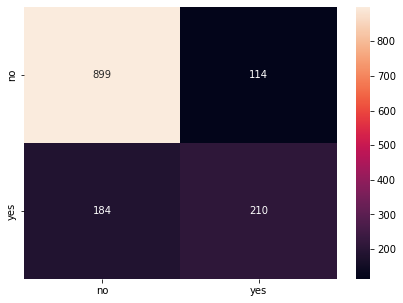

In [468]:
print("confusion matrix for test data")
cm = confusion_matrix(y_test, preds, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['no','yes']],
                  columns = [i for i in ['no','yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()


In [469]:
print("classification  Matrix of testing data:\n",classification_report(y_test,preds))

classification  Matrix of testing data:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1013
           1       0.65      0.53      0.58       394

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



confusion matrix for training data


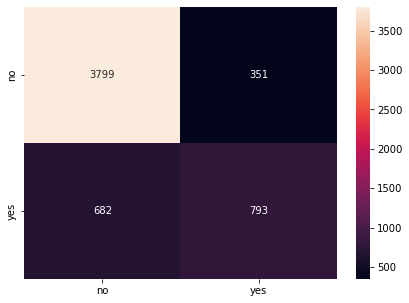

In [470]:
print("confusion matrix for training data")
cm = confusion_matrix(y_train, predictedlabels, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['no','yes']],
                  columns = [i for i in ['no','yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [471]:
print("classification  Matrix of training data:\n",classification_report(y_train,predictedlabels))

classification  Matrix of training data:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4150
           1       0.69      0.54      0.61      1475

    accuracy                           0.82      5625
   macro avg       0.77      0.73      0.74      5625
weighted avg       0.81      0.82      0.81      5625



after optimizing the model we can see that accuracy increased to 79% .

most important parameter is still contract.

training accuarcy is also droped suggesting data is not overftting.

## Part B

1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use
1 Dataset from Part 1 (single/merged).
2. Create separate functions for various purposes.
3. Various base models should be trained to select the best performing model.
4. Pickle file should be saved for the best performing model.

Include best coding practices in the code:
• Modularization
• Maintainability
• Well commented code etc.

In [21]:
def dfinput(): 
    df=pd.read_csv(input("enter csv file name: ")) # user input for file name
    return df

In [22]:
def nonull(df): #dropping the null values
    df=df.replace(r'^\s*$', np.nan, regex=True)
    df= df.dropna()
    return df

In [38]:
def dttypes(df): #chaning the data type
    df['tenure'] = df['tenure'].astype(float)
    df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    return df

In [39]:
def encodes(df): #labeling the columns
    # Creating dummy variables for the variable 'MultipleLines'
    ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
    # Dropping MultipleLines_No phone service column
    ml1 = ml.drop(['MultipleLines_No phone service'], 1)
    #Adding the results to the master dataframe
    df = pd.concat([df,ml1], axis=1)
    # Creating dummy variables for the variable 'OnlineSecurity'.
    os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
    os1 = os.drop(['OnlineSecurity_No internet service'], 1)
    # Adding the results to the master dataframe
    df = pd.concat([df,os1], axis=1)
    # Creating dummy variables for the variable 'OnlineBackup'.
    ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
    ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
    # Adding the results to the master dataframe
    df = pd.concat([df,ob1], axis=1)

    # Creating dummy variables for the variable 'DeviceProtection'. 
    dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
    dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
    # Adding the results to the master dataframe
    df = pd.concat([df,dp1], axis=1)

    # Creating dummy variables for the variable 'TechSupport'. 
    ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
    ts1 = ts.drop(['TechSupport_No internet service'], 1)
    # Adding the results to the master dataframe
    df = pd.concat([df,ts1], axis=1)

    # Creating dummy variables for the variable 'StreamingTV'.
    st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
    st1 = st.drop(['StreamingTV_No internet service'], 1)
    # Adding the results to the master dataframe
    df = pd.concat([df,st1], axis=1)

    # Creating dummy variables for the variable 'StreamingMovies'. 
    sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
    sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
    # Adding the results to the master dataframe
    df = pd.concat([df,sm1], axis=1)
    df = df.drop(['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], 1)
    collist =['Contract', 'PaymentMethod', 'gender', 'InternetService','PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
    LE = LabelEncoder()
    for i in collist:
        df[i] = LE.fit_transform(df[i])
    df =df.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
    return df

In [40]:
def split(df): #spliting the data
    X=df.drop(['Churn','customerID'], axis=1)
    y=df['Churn']
    
    return X,y

In [41]:
def scale(X,y):
    scaler = StandardScaler()
    X[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X[['tenure','MonthlyCharges','TotalCharges']])
    return X,y

In [42]:
def preprocess(df): #merging all the function into preprocessing function
    df=nonull(df)
    df=dttypes(df)
    df=encodes(df)
    X,y= split(df)
    X,y =scale(X,y)

    return X,y

In [43]:
def lr(X,y): # logistic regression function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    LR=LogisticRegression()
    LR.fit(X_train,y_train)
    lr.pllr = LR.predict(X_test)
    lr.srlr=LR.score(X_test, y_test)
    print("Accuracy of logistic regression",lr.srlr*100)
    return lr.srlr,lr.pllr


In [44]:
def knn(X,y): #KNN function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    KNN=KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train,y_train)
    knn.plknn= KNN.predict(X_test)
    knn.srknn=KNN.score(X_test, y_test)
    print("Accuracy of KNN",knn.srknn*100)
    return knn.srknn,knn.plknn

In [45]:
def gn(X,y): # gaussian bayes function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    GN=GaussianNB()
    GN.fit(X_train,y_train)
    gn.plgn = GN.predict(X_test)
    gn.srgn=GN.score(X_test, y_test)
    print("Accuracy of GB",gn.srgn*100)
    return gn.srgn,gn.plgn
    

In [46]:
def svm(X,y): # SVM Function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    SVM = SVC(kernel='poly')
    SVM.fit(X_train,y_train)
    svm.plsvm = SVM.predict(X_test)
    svm.srsvm=SVM.score(X_test, y_test)
    print("Accuracy of SVM",svm.srsvm*100)
    return svm.srsvm,svm.plsvm
  

In [47]:
def dt(X,y): #decision tree function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    DT = DecisionTreeClassifier(criterion="entropy")
    DT.fit(X_train, y_train)
    dt.pldt = DT.predict(X_test)
    dt.srdt=DT.score(X_test, y_test)
    print("Accuracy of DT",dt.srdt*100)
    return dt.srdt,dt.pldt
  

In [48]:
def rst(X,y): # random forest function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    RST = RandomForestClassifier(criterion="entropy")
    RST.fit(X_train, y_train)
    rst.plrst = RST.predict(X_test)
    rst.srrst=RST.score(X_test, y_test)
    print("Accuracy of RST",rst.srrst*100)
    return rst.srrst,rst.plrst
  

In [57]:
def bestmodel(X,y): #best model finding function
    lr.srlr,lr.pllr = lr(X,y)
    knn.srknn,knn.plknn = knn(X,y)
    gn.srgn,gn.plgn = gn(X,y)
    svm.srsvm,svm.plsvm = svm(X,y)
    dt.srdt,dt.pldt = dt(X,y)
    rst.srrst,rst.plrst = rst(X,y)
    acc=[lr.srlr,knn.srknn,gn.srgn,svm.srsvm,dt.srdt,rst.srrst]
    name=['LR','KNN','GB','SVM','DT','RST']
    dic={}
    for i in range(len(name)):
        dic[name[i]] = acc[i]
    print(max(dic, key=dic.get),"is the best base model") #finding best model with accuracy
    filename = 'model'
    outfile = open(filename,'wb')# making pickle file for best model
    if max(dic, key=dic.get)=="LR":
        pickle.dump([lr.srlr,lr.pllr],outfile)
    elif max(dic, key=dic.get)=="KNN":
        pickle.dump([knn.srknn,knn.plknn],outfile)
    elif max(dic, key=dic.get)=="GB":
        pickle.dump([gn.srgn,gn.plgn],outfile)
    elif max(dic, key=dic.get)=="SVM":
        pickle.dump([svm.srsvm,svm.plsvm],outfile)
    elif max(dic, key=dic.get)=="DT":
        pickle.dump([dt.srdt,dt.pldt],outfile)
    else:
        pickle.dump([rst.srrst,rst.plrst],outfile)
    outfile.close()
    infile = open(filename,'rb')
    ndic=pickle.load(infile)
    print("loading data from pickle file for best model \n",ndic)
    
    

    
    
        
    

In [50]:
def main(): # merging all the functions
    df=dfinput()
    X,y = preprocess(df)
    bestmodel(X,y)
    

In [58]:
main() #calling main function

enter csv file name: churn.csv
Accuracy of logistic regression 78.25159914712152
Accuracy of KNN 74.84008528784648
Accuracy of GB 73.91613361762616
Accuracy of SVM 77.96730632551528
Accuracy of DT 72.21037668798863
Accuracy of RST 77.61194029850746
LR is the best base model
loading data from pickle file for best model 
 [0.7825159914712153, array([1, 0, 0, ..., 0, 0, 1])]


after calling the main function we gave input of merged data from part A question.

after running various models we found that logistic regression have the best accuarcy for the model.